In [86]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=5, random_state=11)

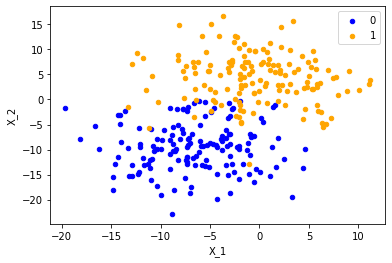

In [87]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [88]:
def next_batch(X, Y, batch_size):
    for i in np.arange(0, X.shape[0], batch_size):
        yield (X[i:i + batch_size], Y[i:i + batch_size])

In [89]:
X = np.c_[np.ones((X.shape[0])), X]

In [90]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [91]:
def hx(W,X):
    return sigmoid(np.dot(X,W))

In [92]:
def cost(W, X, Y):
    y_pred = hx(W,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

In [93]:
def grad(W, X, Y):
    y_pred = hx(W,X)
    print("y_pred", y_pred)
    A = (Y*(1-y_pred) - (1-Y)*y_pred)
    g = -1* np.dot(A.T,X)
    return g

In [94]:

def sgd(W_new, W_prev, lr, batch_size, epochs):
    X_, Y_ = shuffle(X, Y, random_state=0)
    
    for e in range(epochs):
        epoch_loss = []
        X_, Y_ = shuffle(X_, Y_, random_state=0)
        for (batchX, batchY) in next_batch(X_, Y_, batch_size):
            W_prev = W_new

            print("W_prev",W_prev)            
#             print("W_prev",W_prev)
            print("X_" ,X_.shape)
            print("batchX",batchX.shape)
            print(batchX)
            print("batchY",batchY.shape)
            print(batchY)
            gradients = grad(W_prev, batchX, batchY)
            
            print(gradients)
            return
            
#             epoch_loss.append(cost(W_prev, batchX, batchY))
            gradients = grad(W_prev, batchX, batchY)
            W_new = W_prev - lr*gradients
#         print(np.average(epoch_loss))
    return W_new

In [95]:
W = np.random.uniform(size=(X.shape[1],))
W.shape
W = sgd(W, W, .009, 9, 200)

W_prev [0.68161259 0.14404106 0.72448005]
X_ (300, 3)
batchX (9, 3)
[[  1.          -1.88829542   2.3302919 ]
 [  1.         -10.96460974  -5.96349171]
 [  1.          -1.58463113   8.70549127]
 [  1.          -2.03970938  10.26146912]
 [  1.         -12.09363448  -8.90147072]
 [  1.          -9.61657531  -6.11479099]
 [  1.           0.07079001   3.8711527 ]
 [  1.           4.43950205  -3.82210746]
 [  1.          -4.74506482  -0.06890418]]
batchY (9,)
[1 0 1 1 0 0 1 1 1]
y_pred [8.90696031e-01 5.38803372e-03 9.98842478e-01 9.99599358e-01
 5.47661553e-04 5.86067159e-03 9.70584655e-01 1.90316117e-01
 4.87055075e-01]
[-1.45110992 -1.07572953  2.67443016]


In [96]:
print(W)
W = sgd(W, W, .009, 32, 200)
print(W)

None
W_prev None
X_ (300, 3)
batchX (32, 3)
[[  1.          -1.88829542   2.3302919 ]
 [  1.         -10.96460974  -5.96349171]
 [  1.          -1.58463113   8.70549127]
 [  1.          -2.03970938  10.26146912]
 [  1.         -12.09363448  -8.90147072]
 [  1.          -9.61657531  -6.11479099]
 [  1.           0.07079001   3.8711527 ]
 [  1.           4.43950205  -3.82210746]
 [  1.          -4.74506482  -0.06890418]
 [  1.          -5.01028979   2.04793082]
 [  1.         -11.13679115  -5.75996326]
 [  1.           5.87607933  -2.31204892]
 [  1.           3.07040296   3.00582557]
 [  1.          -3.31512422   2.17959063]
 [  1.         -14.58986436 -12.84700833]
 [  1.         -11.08198563 -12.13587606]
 [  1.          -5.94971805  -9.29213686]
 [  1.          -3.08086293   5.58482981]
 [  1.         -19.63192885  -1.6358716 ]
 [  1.          -6.87278575  -6.89522919]
 [  1.          -4.14049272  12.66363998]
 [  1.           4.33950287   8.63548403]
 [  1.          -2.09934298   1.

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [ ]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-W[0]-W[1]*x)/W[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,1], y=X[:,2], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()